In [73]:
cd Data

/Users/ryamaguchi/Desktop/Data


In [ ]:
# Hybrid fitness

平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_firstmig.csv に保存しました。
平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_secondmig.csv に保存しました。
平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_mig.csv に保存しました。


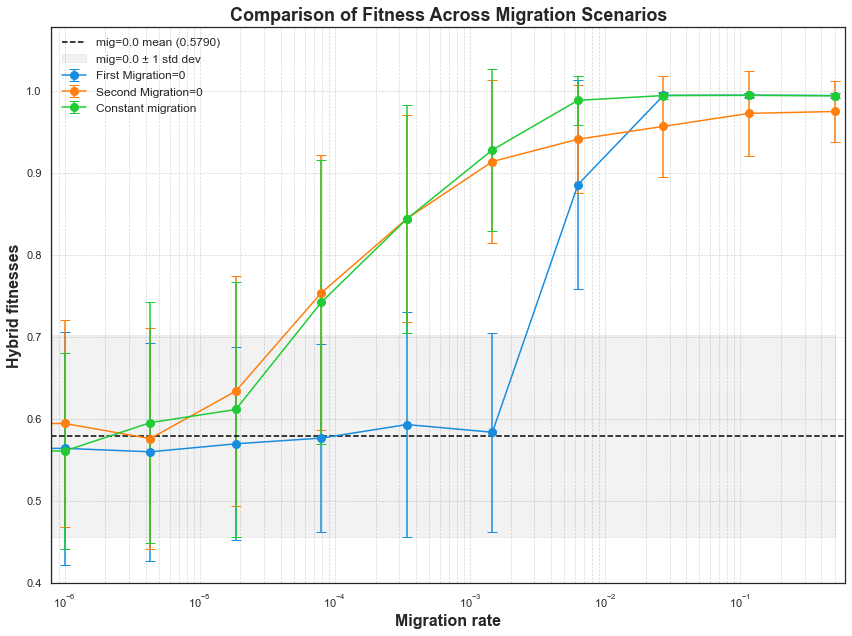

統合プロットを /Users/ryamaguchi/Desktop/Output/Fitness/combined_fitness_plot_with_std.pdf に保存しました。


In [121]:
import os
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns

# Graph save settings
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42  # Save plot as an .svg file for Adobe Illustrator editing

# Use Seaborn style for an elegant appearance
sns.set(style="white")

# Output folder
output_folder = os.path.expanduser("~/Desktop/Output/Fitness")
os.makedirs(output_folder, exist_ok=True)

# List of migration (mig) values (ascending order)
mig_values = [
    "0.0", "1.0e-06", "4.29753e-06", "1.84688e-05", "7.93701e-05", "0.000341095", "0.00146587", "0.00629961", "0.0270727", "0.116346", "0.5"
]

# Common part of the file name
file_templates = [
    'FGM_fitness_firstmig=0_mig={}_run={}_p3.dat',
    'FGM_fitness_secondmig=0_mig={}_run={}_p3.dat',
    'FGM_fitness_mig={}_run={}_p3.dat'
]

# Dictionary to store average values
average_results = {template: {mig: [] for mig in mig_values} for template in file_templates}

# Loop through each template with mig and run
for template in file_templates:
    for mig in mig_values:
        for run_number in range(100):
            if mig == "0.0" and template in [
                'FGM_fitness_firstmig=0_mig={}_run={}_p3.dat',
                'FGM_fitness_secondmig=0_mig={}_run={}_p3.dat']:
                continue  # Use 'FGM_fitness_mig={}_run={}_p3.dat' when m=0.0

            file_path = template.format(mig, run_number)
            try:
                # Read file
                with open(file_path, 'r') as file:
                    data = file.read()

                # Parse data as numerical values (assume space-delimited)
                values = np.array(data.split(), dtype=float)

                # Calculate the mean value
                average = np.mean(values)
                average_results[template][mig].append(average)

            except FileNotFoundError:
                # print(f'File {file_path} not found.')
                pass
            except ValueError as e:
                print(f'ファイル {file_path} のデータが無効です: {e}')

# Save results for each template to a CSV file
for template in file_templates:
    output_csv = os.path.join(output_folder, f'average_results_{template.split("=")[0]}.csv')
    with open(output_csv, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["mig", "runNumber", "average_value"])
        for mig in mig_values:
            for run_number, avg in enumerate(average_results[template][mig]):
                writer.writerow([mig, run_number, avg])
    print(f"平均値を {output_csv} に保存しました。")

# Combine plots into one
plt.figure(figsize=(12, 9))
colors = ['# Color codes for plots
labels = ['First Migration=0', 'Second Migration=0', 'Constant migration']

for idx, template in enumerate(file_templates):
    m_values_new = [float(m.replace('e', 'E')) for m in mig_values]
    m_all_average_values = [
        np.mean(average_results[template][mig]) if average_results[template][mig] else 0 for mig in mig_values
    ]
    m_std_values = [
        np.std(average_results[template][mig]) if average_results[template][mig] else 0 for mig in mig_values
    ]

    # 平均値と標準偏差のプロット
    plt.errorbar(m_values_new, m_all_average_values, yerr=m_std_values, fmt='o-', color=colors[idx], label=labels[idx], markersize=8, capsize=5)

# FGM_fitness_mig={}_run={}_p3.dat の mig=0.0 の平均値と標準偏差
mig_0_mean = np.mean(average_results['FGM_fitness_mig={}_run={}_p3.dat']['0.0'])
mig_0_std = np.std(average_results['FGM_fitness_mig={}_run={}_p3.dat']['0.0'])
plt.axhline(y=mig_0_mean, color='black', linestyle='--', label=f'mig=0.0 mean ({mig_0_mean:.4f})')
plt.fill_between([min(m_values_new), max(m_values_new)],
                 mig_0_mean - mig_0_std,
                 mig_0_mean + mig_0_std,
                 color='black', alpha=0.05, label='mig=0.0 ± 1 std dev')

# Graph settings
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlim(10**(-6.1), 0.6)  # Set y-axis minimum value to 0.4
plt.ylim(0.4, None)  # Set y-axis minimum value to 0.4
plt.xlabel('Migration rate', fontsize=16, fontweight='bold')
plt.ylabel('Hybrid fitnesses', fontsize=16, fontweight='bold')
plt.grid(visible=True, which="both", linestyle="--", linewidth=0.7, alpha=0.8)
plt.title("Comparison of Fitness Across Migration Scenarios", fontsize=18, fontweight='bold')
plt.legend(fontsize=12)
plt.tight_layout()

# Save plot
plot_file = os.path.join(output_folder, 'combined_fitness_plot_with_std.pdf')
plt.savefig(plot_file, format='pdf')
plt.show()

平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_firstmig.csv に保存しました。
平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_secondmig.csv に保存しました。
平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_mig.csv に保存しました。


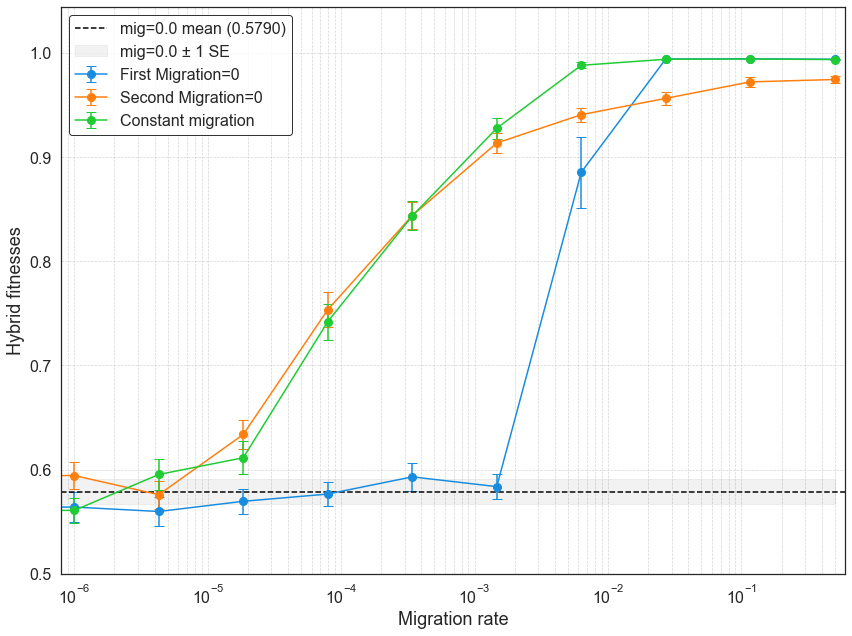

統合プロットを /Users/ryamaguchi/Desktop/Output/Fitness/combined_fitness_plot_with_std.pdf に保存しました。


In [132]:
import os
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns

# Graph save settings
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42  # Save plot as an .svg file for Adobe Illustrator editing

# Use Seaborn style for an elegant appearance
sns.set(style="white")

# Output folder
output_folder = os.path.expanduser("~/Desktop/Output/Fitness")
os.makedirs(output_folder, exist_ok=True)

# List of migration (mig) values (ascending order)
mig_values = [
    "0.0", "1.0e-06", "4.29753e-06", "1.84688e-05", "7.93701e-05", "0.000341095", "0.00146587", "0.00629961", "0.0270727", "0.116346", "0.5"
]

# Common part of the file name
file_templates = [
    'FGM_fitness_firstmig=0_mig={}_run={}_p3.dat',
    'FGM_fitness_secondmig=0_mig={}_run={}_p3.dat',
    'FGM_fitness_mig={}_run={}_p3.dat'
]

# Dictionary to store average values
average_results = {template: {mig: [] for mig in mig_values} for template in file_templates}

# Loop through each template with mig and run
for template in file_templates:
    for mig in mig_values:
        for run_number in range(100):
            if mig == "0.0" and template in [
                'FGM_fitness_firstmig=0_mig={}_run={}_p3.dat',
                'FGM_fitness_secondmig=0_mig={}_run={}_p3.dat']:
                continue  # Use 'FGM_fitness_mig={}_run={}_p3.dat' when m=0.0

            file_path = template.format(mig, run_number)
            try:
                # Read file
                with open(file_path, 'r') as file:
                    data = file.read()

                # Parse data as numerical values (assume space-delimited)
                values = np.array(data.split(), dtype=float)

                # Calculate the mean value
                average = np.mean(values)
                average_results[template][mig].append(average)

            except FileNotFoundError:
                # print(f'File {file_path} not found.')
                pass
            except ValueError as e:
                print(f'ファイル {file_path} のデータが無効です: {e}')

# Save results for each template to a CSV file
for template in file_templates:
    output_csv = os.path.join(output_folder, f'average_results_{template.split("=")[0]}.csv')
    with open(output_csv, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["mig", "runNumber", "average_value"])
        for mig in mig_values:
            for run_number, avg in enumerate(average_results[template][mig]):
                writer.writerow([mig, run_number, avg])
    print(f"平均値を {output_csv} に保存しました。")

# Combine plots into one
plt.figure(figsize=(12, 9))
colors = ['# Color codes for plots
labels = ['First Migration=0', 'Second Migration=0', 'Constant migration']

# Modify to calculate and display standard errors (SE)
for idx, template in enumerate(file_templates):
    m_values_new = [float(m.replace('e', 'E')) for m in mig_values]
    m_all_average_values = [
        np.mean(average_results[template][mig]) if average_results[template][mig] else 0 for mig in mig_values
    ]
    m_std_values = [
        np.std(average_results[template][mig]) / np.sqrt(len(average_results[template][mig]))
        if average_results[template][mig] else 0 for mig in mig_values
    ]

    # Plot mean values with standard errors (add horizontal bars to error bar tips)
    plt.errorbar(m_values_new, m_all_average_values, yerr=m_std_values, fmt='o-', 
                 color=colors[idx], label=labels[idx], markersize=8, capsize=5)


# FGM_fitness_mig={}_run={}_p3.dat の mig=0.0 の平均値と標準誤差
mig_0_values = average_results['FGM_fitness_mig={}_run={}_p3.dat']['0.0']
mig_0_mean = np.mean(mig_0_values)
mig_0_se = np.std(mig_0_values) / np.sqrt(len(mig_0_values))

# 平均値と標準誤差で描画
plt.axhline(y=mig_0_mean, color='black', linestyle='--', label=f'mig=0.0 mean ({mig_0_mean:.4f})')
plt.fill_between([min(m_values_new), max(m_values_new)],
                 mig_0_mean - mig_0_se,
                 mig_0_mean + mig_0_se,
                 color='black', alpha=0.05, label='mig=0.0 ± 1 SE')


# Graph settings
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlim(10**(-6.1), 0.6)  # Set y-axis minimum value to 0.4
plt.ylim(0.5, None)  # Set y-axis minimum value to 0.4
plt.xlabel('Migration rate', fontsize=18)
plt.ylabel('Hybrid fitnesses', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16) 
plt.tick_params(axis='both', which='minor', labelsize=14)  
plt.grid(visible=True, which="both", linestyle="--", linewidth=0.7, alpha=0.8)
plt.legend(fontsize=16, fancybox=True, frameon=True, edgecolor="black", shadow=False)
plt.tight_layout()

# Save plot
plot_file = os.path.join(output_folder, 'combined_fitness_plot_with_std.pdf')
plt.savefig(plot_file, format='pdf')
plt.show()

平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_ecological_pi6_firstmig.csv に保存しました。
平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_ecological_pi6_secondmig.csv に保存しました。
平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_ecological_pi6_mig.csv に保存しました。


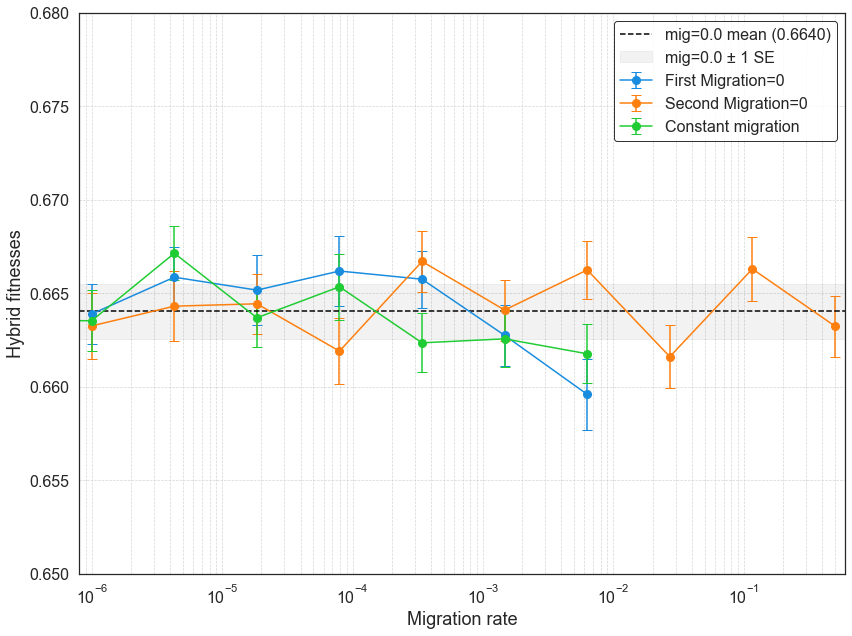

統合プロットを /Users/ryamaguchi/Desktop/Output/Fitness/combined_fitness_plot_6pi.pdf に保存しました。


In [151]:
import os
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns

# Graph save settings
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42  # Save plot as an .svg file for Adobe Illustrator editing

# Use Seaborn style for an elegant appearance
sns.set(style="white")

# Output folder
output_folder = os.path.expanduser("~/Desktop/Output/Fitness")
os.makedirs(output_folder, exist_ok=True)

# List of migration (mig) values (ascending order)
mig_values = [
    "0.0", "1.0e-06", "4.29753e-06", "1.84688e-05", "7.93701e-05", "0.000341095", "0.00146587", "0.00629961", "0.0270727", "0.116346", "0.5"
]

# Common part of the file name
file_templates = [
    'FGM_fitness_ecological_pi6_firstmig=0_mig={}_run={}_p3.dat',
    'FGM_fitness_ecological_pi6_secondmig=0_mig={}_run={}_p3.dat',
    'FGM_fitness_ecological_pi6_mig={}_run={}_p3.dat'
]

# Dictionary to store average values
average_results = {template: {mig: [] for mig in mig_values} for template in file_templates}

# Loop through each template with mig and run
for template in file_templates:
    for mig in mig_values:
        for run_number in range(100):
            if mig == "0.0" and template in [
                'FGM_fitness_ecological_pi6_firstmig=0_mig={}_run={}_p3.dat',
                'FGM_fitness_ecological_pi6_secondmig=0_mig={}_run={}_p3.dat']:
                continue

            file_path = template.format(mig, run_number)
            try:
                # Read file
                with open(file_path, 'r') as file:
                    data = file.read()

                # Parse data as numerical values (assume space-delimited)
                values = np.array(data.split(), dtype=float)

                # Calculate the mean value
                average = np.mean(values)
                average_results[template][mig].append(average)

            except FileNotFoundError:
                # print(f'File {file_path} not found.')
                pass
            except ValueError as e:
                print(f'ファイル {file_path} のデータが無効です: {e}')

# Save results for each template to a CSV file
for template in file_templates:
    output_csv = os.path.join(output_folder, f'average_results_{template.split("=")[0]}.csv')
    with open(output_csv, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["mig", "runNumber", "average_value"])
        for mig in mig_values:
            for run_number, avg in enumerate(average_results[template][mig]):
                writer.writerow([mig, run_number, avg])
    print(f"平均値を {output_csv} に保存しました。")

# Combine plots into one
plt.figure(figsize=(12, 9))
colors = ['# Color codes for plots
labels = ['First Migration=0', 'Second Migration=0', 'Constant migration']

# Modify to calculate and display standard errors (SE)
for idx, template in enumerate(file_templates):
    m_values_new = []  # プロットする mig 値
    m_all_average_values = []  # 平均値
    m_std_values = []  # 標準誤差

    for mig in mig_values:
        if len(average_results[template][mig]) > 10:  # ファイル数が10を超える場合のみ
            m_values_new.append(float(mig.replace('e', 'E')))
            m_all_average_values.append(np.mean(average_results[template][mig]))
            m_std_values.append(
                np.std(average_results[template][mig]) / np.sqrt(len(average_results[template][mig]))
            )

    # 平均値と標準誤差のプロット
    if m_values_new:
        plt.errorbar(m_values_new, m_all_average_values, yerr=m_std_values, fmt='o-',
                     color=colors[idx], label=labels[idx], markersize=8, capsize=5)

# FGM_fitness_mig={}_run={}_p3.dat の mig=0.0 の平均値と標準誤差
mig_0_values = average_results['FGM_fitness_ecological_pi6_mig={}_run={}_p3.dat']['0.0']
if len(mig_0_values) > 10:  # mig=0.0 のファイル数もチェック
    mig_0_mean = np.mean(mig_0_values)
    mig_0_se = np.std(mig_0_values) / np.sqrt(len(mig_0_values))

    # 平均値と標準誤差で描画
    plt.axhline(y=mig_0_mean, color='black', linestyle='--', label=f'mig=0.0 mean ({mig_0_mean:.4f})')
    plt.fill_between([10**(-6.1), 0.6],
                     mig_0_mean - mig_0_se,
                     mig_0_mean + mig_0_se,
                     color='black', alpha=0.05, label='mig=0.0 ± 1 SE')

# Graph settings
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlim(10**(-6.1), 0.6)  # x軸の範囲設定
plt.ylim(0.65, 0.68)  # y軸の範囲設定
plt.xlabel('Migration rate', fontsize=18)
plt.ylabel('Hybrid fitnesses', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.grid(visible=True, which="both", linestyle="--", linewidth=0.7, alpha=0.8)
plt.legend(fontsize=16, fancybox=True, frameon=True, edgecolor="black", shadow=False)
plt.tight_layout()

# Save plot
plot_file = os.path.join(output_folder, 'combined_fitness_plot_6pi.pdf')
plt.savefig(plot_file, format='pdf')
plt.show()
print(f"統合プロットを {plot_file} に保存しました。")

平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_ecological_pi4_firstmig.csv に保存しました。
平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_ecological_pi4_secondmig.csv に保存しました。
平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_ecological_pi4_mig.csv に保存しました。


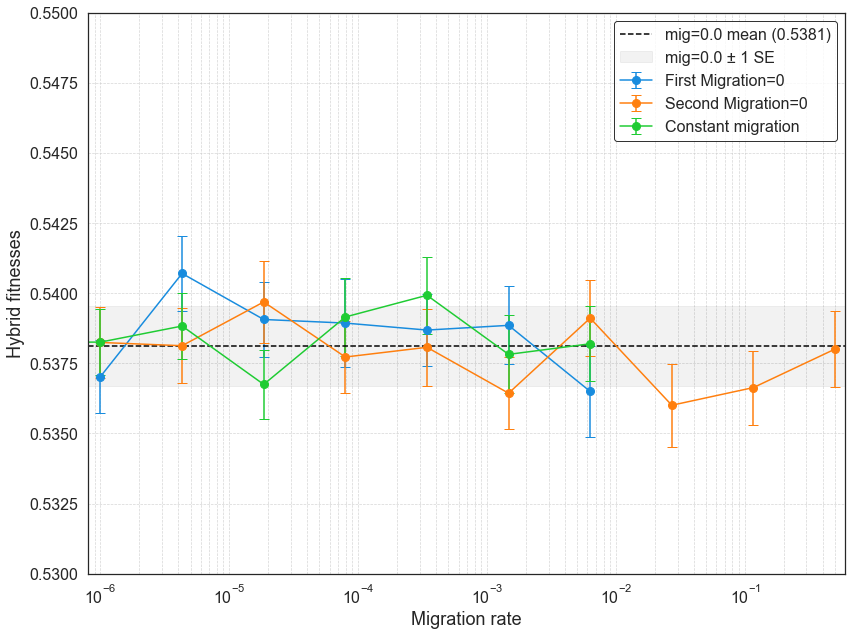

統合プロットを /Users/ryamaguchi/Desktop/Output/Fitness/combined_fitness_plot_4pi.pdf に保存しました。


In [147]:
import os
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns

# Graph save settings
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42  # Save plot as an .svg file for Adobe Illustrator editing

# Use Seaborn style for an elegant appearance
sns.set(style="white")

# Output folder
output_folder = os.path.expanduser("~/Desktop/Output/Fitness")
os.makedirs(output_folder, exist_ok=True)

# List of migration (mig) values (ascending order)
mig_values = [
    "0.0", "1.0e-06", "4.29753e-06", "1.84688e-05", "7.93701e-05", "0.000341095", "0.00146587", "0.00629961", "0.0270727", "0.116346", "0.5"
]

# Common part of the file name
file_templates = [
    'FGM_fitness_ecological_pi4_firstmig=0_mig={}_run={}_p3.dat',
    'FGM_fitness_ecological_pi4_secondmig=0_mig={}_run={}_p3.dat',
    'FGM_fitness_ecological_pi4_mig={}_run={}_p3.dat'
]

# Dictionary to store average values
average_results = {template: {mig: [] for mig in mig_values} for template in file_templates}

# Loop through each template with mig and run
for template in file_templates:
    for mig in mig_values:
        for run_number in range(100):
            if mig == "0.0" and template in [
                'FGM_fitness_ecological_pi4_firstmig=0_mig={}_run={}_p3.dat',
                'FGM_fitness_ecological_pi4_secondmig=0_mig={}_run={}_p3.dat']:
                continue

            file_path = template.format(mig, run_number)
            try:
                # Read file
                with open(file_path, 'r') as file:
                    data = file.read()

                # Parse data as numerical values (assume space-delimited)
                values = np.array(data.split(), dtype=float)

                # Calculate the mean value
                average = np.mean(values)
                average_results[template][mig].append(average)

            except FileNotFoundError:
                # print(f'File {file_path} not found.')
                pass
            except ValueError as e:
                print(f'ファイル {file_path} のデータが無効です: {e}')

# Save results for each template to a CSV file
for template in file_templates:
    output_csv = os.path.join(output_folder, f'average_results_{template.split("=")[0]}.csv')
    with open(output_csv, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["mig", "runNumber", "average_value"])
        for mig in mig_values:
            for run_number, avg in enumerate(average_results[template][mig]):
                writer.writerow([mig, run_number, avg])
    print(f"平均値を {output_csv} に保存しました。")

# Combine plots into one
plt.figure(figsize=(12, 9))
colors = ['# Color codes for plots
labels = ['First Migration=0', 'Second Migration=0', 'Constant migration']

# Modify to calculate and display standard errors (SE)
for idx, template in enumerate(file_templates):
    m_values_new = []  # プロットする mig 値
    m_all_average_values = []  # 平均値
    m_std_values = []  # 標準誤差

    for mig in mig_values:
        if len(average_results[template][mig]) > 10:  # ファイル数が10を超える場合のみ
            m_values_new.append(float(mig.replace('e', 'E')))
            m_all_average_values.append(np.mean(average_results[template][mig]))
            m_std_values.append(
                np.std(average_results[template][mig]) / np.sqrt(len(average_results[template][mig]))
            )

    # 平均値と標準誤差のプロット
    if m_values_new:
        plt.errorbar(m_values_new, m_all_average_values, yerr=m_std_values, fmt='o-',
                     color=colors[idx], label=labels[idx], markersize=8, capsize=5)

# FGM_fitness_mig={}_run={}_p3.dat の mig=0.0 の平均値と標準誤差
mig_0_values = average_results['FGM_fitness_ecological_pi4_mig={}_run={}_p3.dat']['0.0']
if len(mig_0_values) > 10:  # mig=0.0 のファイル数もチェック
    mig_0_mean = np.mean(mig_0_values)
    mig_0_se = np.std(mig_0_values) / np.sqrt(len(mig_0_values))

    # 平均値と標準誤差で描画
    plt.axhline(y=mig_0_mean, color='black', linestyle='--', label=f'mig=0.0 mean ({mig_0_mean:.4f})')
    plt.fill_between([10**(-6.1), 0.6],
                     mig_0_mean - mig_0_se,
                     mig_0_mean + mig_0_se,
                     color='black', alpha=0.05, label='mig=0.0 ± 1 SE')

# Graph settings
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlim(10**(-6.1), 0.6)  # x軸の範囲設定
plt.ylim(0.53, 0.55)  # y軸の最小値を 0.5 に設定
plt.xlabel('Migration rate', fontsize=18)
plt.ylabel('Hybrid fitnesses', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.grid(visible=True, which="both", linestyle="--", linewidth=0.7, alpha=0.8)
plt.legend(fontsize=16, fancybox=True, frameon=True, edgecolor="black", shadow=False)
plt.tight_layout()

# Save plot
plot_file = os.path.join(output_folder, 'combined_fitness_plot_4pi.pdf')
plt.savefig(plot_file, format='pdf')
plt.show()
print(f"統合プロットを {plot_file} に保存しました。")

平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_ecological_pi2_firstmig.csv に保存しました。
平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_ecological_pi2_secondmig.csv に保存しました。
平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_ecological_pi2_mig.csv に保存しました。


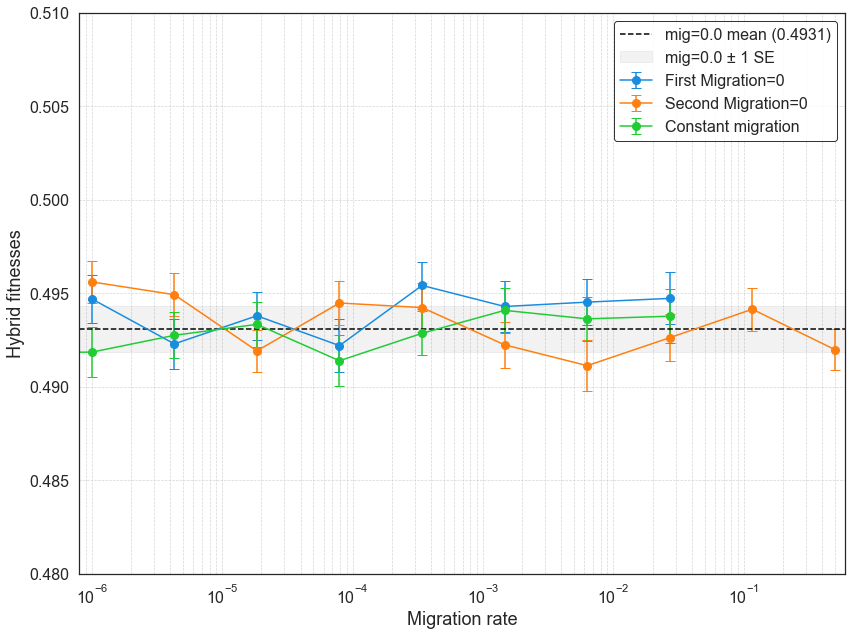

統合プロットを /Users/ryamaguchi/Desktop/Output/Fitness/combined_fitness_plot_2pi.pdf に保存しました。


In [154]:
import os
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns

# Graph save settings
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42  # Save plot as an .svg file for Adobe Illustrator editing

# Use Seaborn style for an elegant appearance
sns.set(style="white")

# Output folder
output_folder = os.path.expanduser("~/Desktop/Output/Fitness")
os.makedirs(output_folder, exist_ok=True)

# List of migration (mig) values (ascending order)
mig_values = [
    "0.0", "1.0e-06", "4.29753e-06", "1.84688e-05", "7.93701e-05", "0.000341095", "0.00146587", "0.00629961", "0.0270727", "0.116346", "0.5"
]

# Common part of the file name
file_templates = [
    'FGM_fitness_ecological_pi2_firstmig=0_mig={}_run={}_p3.dat',
    'FGM_fitness_ecological_pi2_secondmig=0_mig={}_run={}_p3.dat',
    'FGM_fitness_ecological_pi2_mig={}_run={}_p3.dat'
]

# Dictionary to store average values
average_results = {template: {mig: [] for mig in mig_values} for template in file_templates}

# Loop through each template with mig and run
for template in file_templates:
    for mig in mig_values:
        for run_number in range(100):
            if mig == "0.0" and template in [
                'FGM_fitness_ecological_pi2_firstmig=0_mig={}_run={}_p3.dat',
                'FGM_fitness_ecological_pi2_secondmig=0_mig={}_run={}_p3.dat']:
                continue

            file_path = template.format(mig, run_number)
            try:
                # Read file
                with open(file_path, 'r') as file:
                    data = file.read()

                # Parse data as numerical values (assume space-delimited)
                values = np.array(data.split(), dtype=float)

                # Calculate the mean value
                average = np.mean(values)
                average_results[template][mig].append(average)

            except FileNotFoundError:
                # print(f'File {file_path} not found.')
                pass
            except ValueError as e:
                print(f'ファイル {file_path} のデータが無効です: {e}')

# Save results for each template to a CSV file
for template in file_templates:
    output_csv = os.path.join(output_folder, f'average_results_{template.split("=")[0]}.csv')
    with open(output_csv, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["mig", "runNumber", "average_value"])
        for mig in mig_values:
            for run_number, avg in enumerate(average_results[template][mig]):
                writer.writerow([mig, run_number, avg])
    print(f"平均値を {output_csv} に保存しました。")

# Combine plots into one
plt.figure(figsize=(12, 9))
colors = ['# Color codes for plots
labels = ['First Migration=0', 'Second Migration=0', 'Constant migration']

# Modify to calculate and display standard errors (SE)
for idx, template in enumerate(file_templates):
    m_values_new = []  # プロットする mig 値
    m_all_average_values = []  # 平均値
    m_std_values = []  # 標準誤差

    for mig in mig_values:
        if len(average_results[template][mig]) > 10:  # ファイル数が10を超える場合のみ
            m_values_new.append(float(mig.replace('e', 'E')))
            m_all_average_values.append(np.mean(average_results[template][mig]))
            m_std_values.append(
                np.std(average_results[template][mig]) / np.sqrt(len(average_results[template][mig]))
            )

    # 平均値と標準誤差のプロット
    if m_values_new:
        plt.errorbar(m_values_new, m_all_average_values, yerr=m_std_values, fmt='o-',
                     color=colors[idx], label=labels[idx], markersize=8, capsize=5)

# FGM_fitness_mig={}_run={}_p3.dat の mig=0.0 の平均値と標準誤差
mig_0_values = average_results['FGM_fitness_ecological_pi2_mig={}_run={}_p3.dat']['0.0']
if len(mig_0_values) > 10:  # mig=0.0 のファイル数もチェック
    mig_0_mean = np.mean(mig_0_values)
    mig_0_se = np.std(mig_0_values) / np.sqrt(len(mig_0_values))

    # 平均値と標準誤差で描画
    plt.axhline(y=mig_0_mean, color='black', linestyle='--', label=f'mig=0.0 mean ({mig_0_mean:.4f})')
    plt.fill_between([10**(-6.1), 0.6],
                     mig_0_mean - mig_0_se,
                     mig_0_mean + mig_0_se,
                     color='black', alpha=0.05, label='mig=0.0 ± 1 SE')

# Graph settings
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlim(10**(-6.1), 0.6)  # x軸の範囲設定
plt.ylim(0.48, 0.51)  # y軸の範囲設定
plt.xlabel('Migration rate', fontsize=18)
plt.ylabel('Hybrid fitnesses', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.grid(visible=True, which="both", linestyle="--", linewidth=0.7, alpha=0.8)
plt.legend(fontsize=16, fancybox=True, frameon=True, edgecolor="black", shadow=False)
plt.tight_layout()

# Save plot
plot_file = os.path.join(output_folder, 'combined_fitness_plot_2pi.pdf')
plt.savefig(plot_file, format='pdf')
plt.show()
print(f"統合プロットを {plot_file} に保存しました。")

In [ ]:
# Allele frequency spectrum

ヒストグラムデータを /Users/ryamaguchi/Desktop/Output/AFS/histogram_mig_0.0.csv に保存しました。


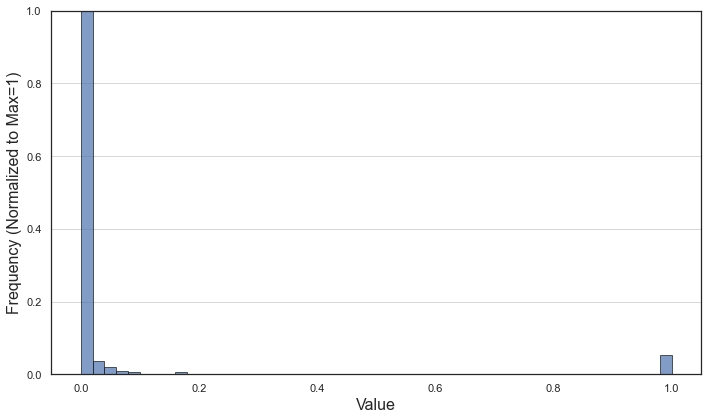

ヒストグラムプロットを /Users/ryamaguchi/Desktop/Output/AFS/histogram_mig_0.0.svg に保存しました。
ヒストグラムデータを /Users/ryamaguchi/Desktop/Output/AFS/histogram_mig_1.0e-06.csv に保存しました。


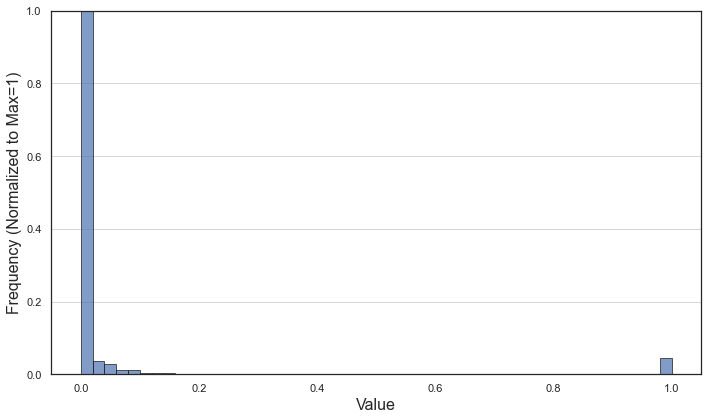

ヒストグラムプロットを /Users/ryamaguchi/Desktop/Output/AFS/histogram_mig_1.0e-06.svg に保存しました。
ヒストグラムデータを /Users/ryamaguchi/Desktop/Output/AFS/histogram_mig_4.29753e-06.csv に保存しました。


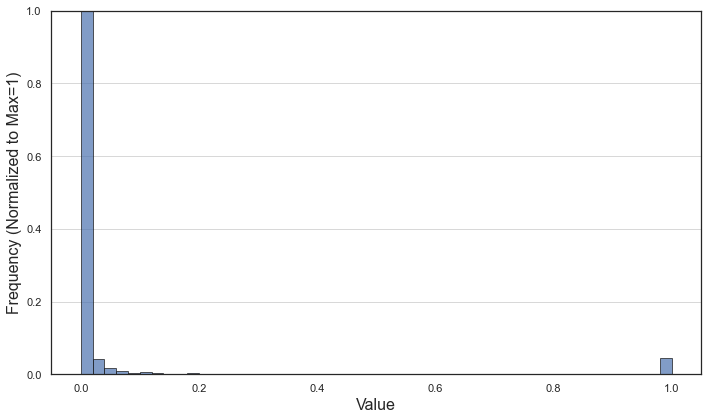

ヒストグラムプロットを /Users/ryamaguchi/Desktop/Output/AFS/histogram_mig_4.29753e-06.svg に保存しました。
ヒストグラムデータを /Users/ryamaguchi/Desktop/Output/AFS/histogram_mig_1.84688e-05.csv に保存しました。


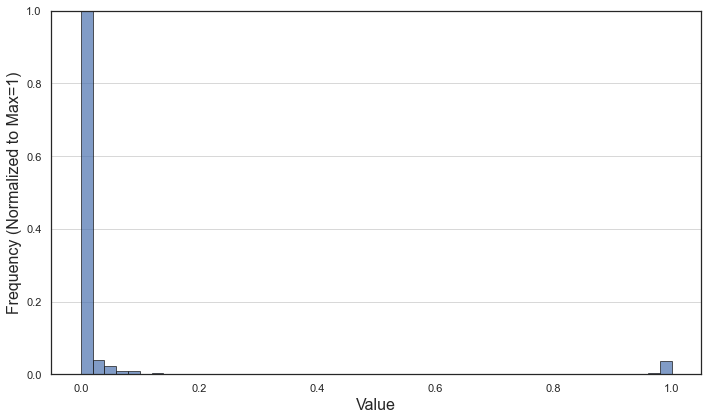

ヒストグラムプロットを /Users/ryamaguchi/Desktop/Output/AFS/histogram_mig_1.84688e-05.svg に保存しました。
ヒストグラムデータを /Users/ryamaguchi/Desktop/Output/AFS/histogram_mig_7.93701e-05.csv に保存しました。


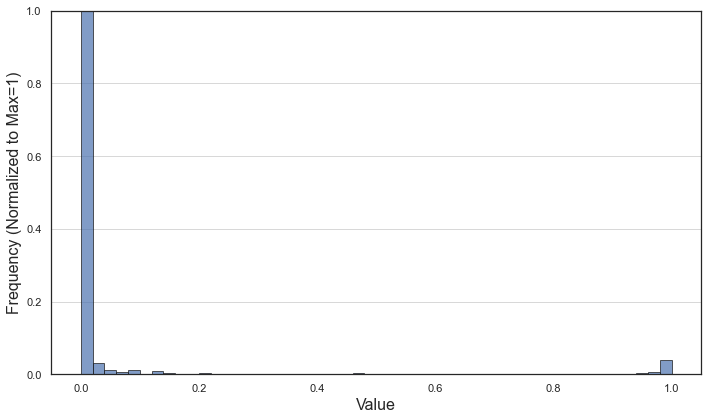

ヒストグラムプロットを /Users/ryamaguchi/Desktop/Output/AFS/histogram_mig_7.93701e-05.svg に保存しました。
ヒストグラムデータを /Users/ryamaguchi/Desktop/Output/AFS/histogram_mig_0.000341095.csv に保存しました。


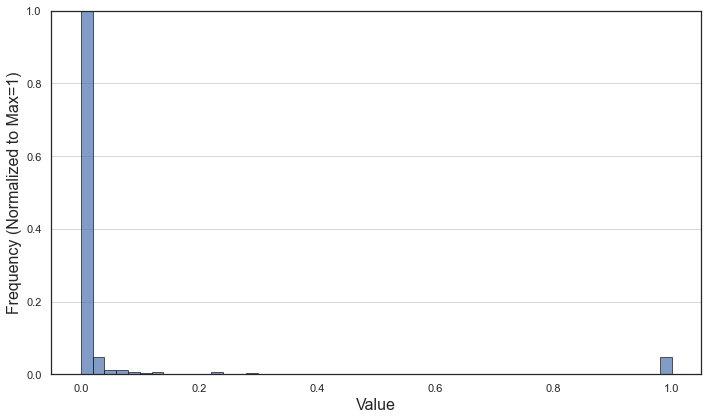

ヒストグラムプロットを /Users/ryamaguchi/Desktop/Output/AFS/histogram_mig_0.000341095.svg に保存しました。
ヒストグラムデータを /Users/ryamaguchi/Desktop/Output/AFS/histogram_mig_0.00146587.csv に保存しました。


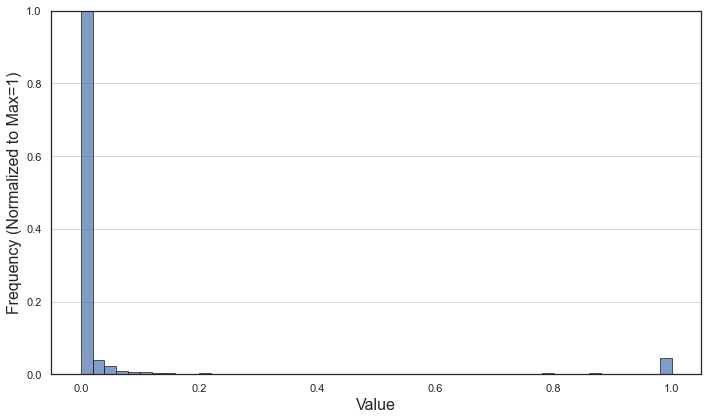

ヒストグラムプロットを /Users/ryamaguchi/Desktop/Output/AFS/histogram_mig_0.00146587.svg に保存しました。
ヒストグラムデータを /Users/ryamaguchi/Desktop/Output/AFS/histogram_mig_0.00629961.csv に保存しました。


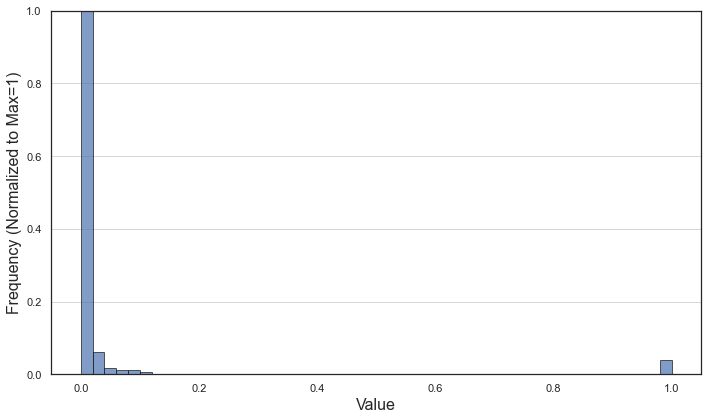

ヒストグラムプロットを /Users/ryamaguchi/Desktop/Output/AFS/histogram_mig_0.00629961.svg に保存しました。
ヒストグラムデータを /Users/ryamaguchi/Desktop/Output/AFS/histogram_mig_0.0270727.csv に保存しました。


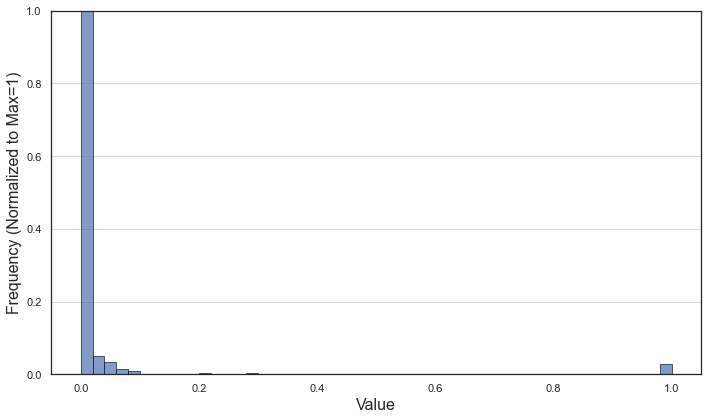

ヒストグラムプロットを /Users/ryamaguchi/Desktop/Output/AFS/histogram_mig_0.0270727.svg に保存しました。
ヒストグラムデータを /Users/ryamaguchi/Desktop/Output/AFS/histogram_mig_0.116346.csv に保存しました。


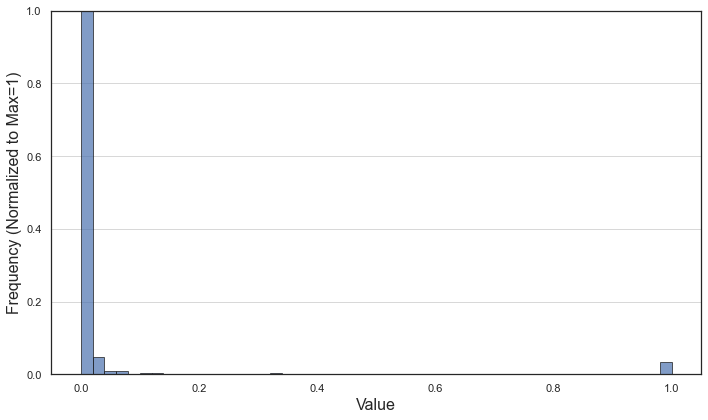

ヒストグラムプロットを /Users/ryamaguchi/Desktop/Output/AFS/histogram_mig_0.116346.svg に保存しました。
ヒストグラムデータを /Users/ryamaguchi/Desktop/Output/AFS/histogram_mig_0.5.csv に保存しました。


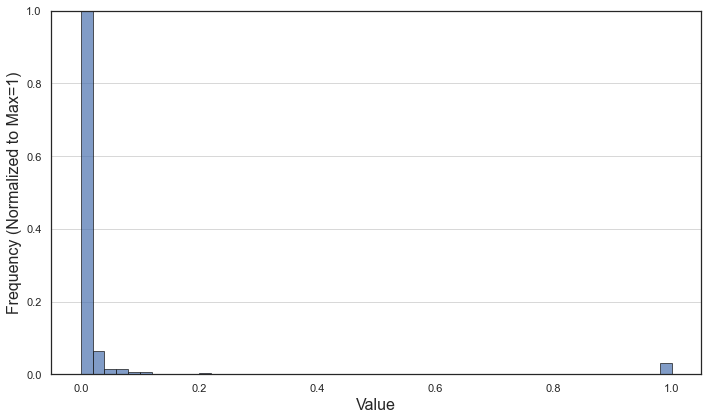

ヒストグラムプロットを /Users/ryamaguchi/Desktop/Output/AFS/histogram_mig_0.5.svg に保存しました。


In [68]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Graph save settings
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42  # Save plot as an .svg file for Adobe Illustrator editing

# Use Seaborn style for an elegant appearance
sns.set(style="white")

# List of migration (mig) values (ascending order)
mig_values = [
    "0.0", "1.0e-06", "4.29753e-06", "1.84688e-05", "7.93701e-05", "0.000341095", "0.00146587", "0.00629961", "0.0270727", "0.116346", "0.5"
]

# Common part of the file name
file_template = 'FGM_mutfreq_mig={}_run={}_p1.dat'

# Output folder
output_folder = os.path.expanduser("~/Desktop/Output/AFS")
os.makedirs(output_folder, exist_ok=True)

# mig ごとに全 run の平均ヒストグラムを計算
for mig in mig_values:
    all_run_values = []

    for run_number in range(4):
        file_path = file_template.format(mig, run_number)
        try:
            # Load data
            data = pd.read_csv(file_path, delim_whitespace=True, header=None)

            # データを1次元にフラット化して保存
            all_run_values.extend(data.values.flatten())

        except FileNotFoundError:
            print(f'ファイル {file_path} が見つかりませんでした。')
        except pd.errors.EmptyDataError:
            print(f'ファイル {file_path} にデータが含まれていません。')
        except Exception as e:
            print(f'ファイル {file_path} の処理中にエラーが発生しました: {e}')

    # 全 run のデータを平均したヒストグラムを計算
    if all_run_values:
        counts, bins = np.histogram(all_run_values, bins=50, density=True)
        counts = counts / max(counts)  # Normalize so the y-axis maximum value is 1

        # Save histogram data
        output_file = os.path.join(output_folder, f"histogram_mig_{mig}.csv")
        pd.DataFrame({"bin_start": bins[:-1], "bin_end": bins[1:], "normalized_count": counts}).to_csv(output_file, index=False)
        print(f"ヒストグラムデータを {output_file} に保存しました。")

        # ヒストグラムのプロット
        plt.figure(figsize=(10, 6))
        plt.bar(bins[:-1], counts, width=np.diff(bins), edgecolor='k', align='edge', alpha=0.7)
        plt.xlabel('Value', fontsize=16)
        plt.ylabel('Frequency', fontsize=16)
        plt.ylim(0, 1)
        plt.grid(axis='y', alpha=0.75)
        plt.tight_layout()

        # Save plot
        plot_file = os.path.join(output_folder, f"histogram_mig_{mig}.svg")
        plt.savefig(plot_file, format='svg')
        plt.show()
        print(f"ヒストグラムプロットを {plot_file} に保存しました。")
    else:
        print(f'mig={mig} のデータが不足しているためヒストグラムを生成できませんでした。')


In [ ]:
# Speed of adaptation

世代データを /Users/ryamaguchi/desktop/Output/fitness_generations.csv に保存しました。


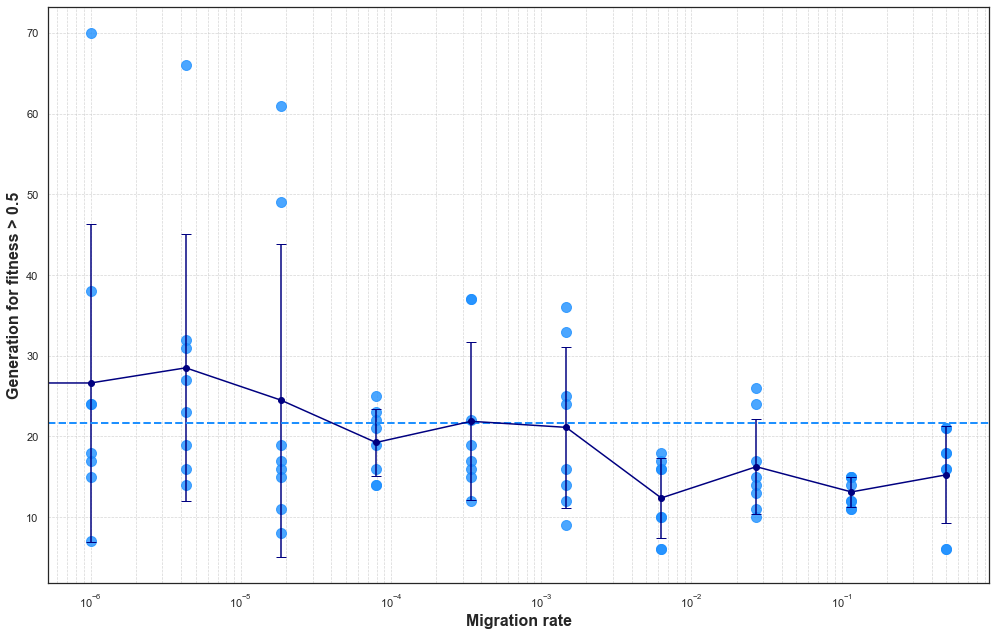

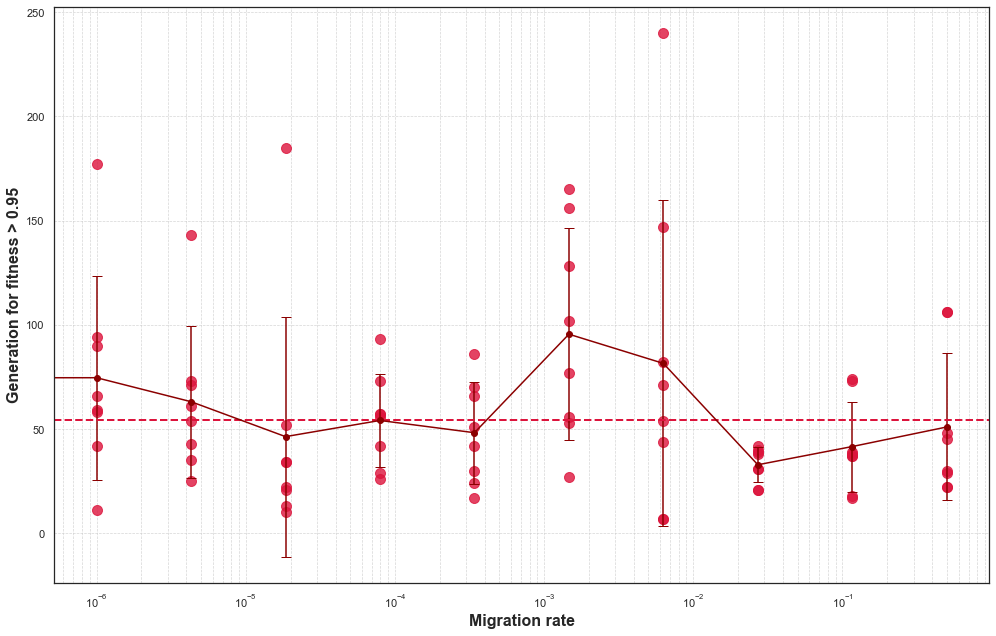

In [59]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Graph save settings
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42  # Save plot as an .svg file for Adobe Illustrator editing

# List of migration (mig) values (ascending order)
mig_values = [
    "0.0", "1.0e-06", "4.29753e-06", "1.84688e-05", "7.93701e-05", "0.000341095", "0.00146587", "0.00629961", "0.0270727", "0.116346", "0.5"
]

# Common part of the file name
file_templates = [
    'FGM_experiment_mig={}_run={}_p1.dat',
    'FGM_experiment_mig={}_run={}_p2.dat'
]

# Output folder
output_folder = os.path.expanduser("~/Desktop/Output")
os.makedirs(output_folder, exist_ok=True)

# mig ごとに全 run のフィットネス世代を計算
results = []

for mig in mig_values:
    for run_number in range(4):
        for file_template in file_templates:
            file_path = file_template.format(mig, run_number)
            try:
                # Load data
                data = pd.read_csv(file_path, delim_whitespace=True)

                # フィットネスが0.5および0.95を超える世代を抽出
                generation_0_5 = data[data['fitness'] > 0.5]['generation'].min()
                generation_0_95 = data[data['fitness'] > 0.95]['generation'].min()

                # 結果をリストに追加
                results.append({
                    "mig": mig,
                    "run_number": run_number,
                    "generation_0_5": generation_0_5,
                    "generation_0_95": generation_0_95
                })

            except FileNotFoundError:
                print(f'ファイル {file_path} が見つかりませんでした。')
            except pd.errors.EmptyDataError:
                print(f'ファイル {file_path} にデータが含まれていません。')
            except Exception as e:
                print(f'ファイル {file_path} の処理中にエラーが発生しました: {e}')

# Save results to CSV
output_file = os.path.join(output_folder, "fitness_generations.csv")
pd.DataFrame(results).to_csv(output_file, index=False)
print(f"世代データを {output_file} に保存しました。")

# Analyze and plot results
results_df = pd.DataFrame(results)
results_df["mig_float"] = results_df["mig"].astype(float)

# 平均値と標準偏差の計算
summary = results_df.groupby("mig_float").agg(
    mean_0_5=("generation_0_5", "mean"),
    std_0_5=("generation_0_5", "std"),
    mean_0_95=("generation_0_95", "mean"),
    std_0_95=("generation_0_95", "std")
).reset_index()

# Use Seaborn style for an elegant appearance
sns.set(style="white")

# Plot for generations > 0.5
plt.figure(figsize=(14, 9))

# 個々の点をプロット
plt.scatter(results_df["mig_float"], results_df["generation_0_5"], alpha=0.8, s=100, label="Gen > 0.5 (runs)", color="dodgerblue")

# 平均値と標準偏差のプロット
plt.errorbar(summary["mig_float"], summary["mean_0_5"], yerr=summary["std_0_5"], fmt="o-", color="navy", capsize=5, label="Gen > 0.5 (mean ± SD)")

# Display mean values for m=0 with horizontal lines
if 0.0 in summary["mig_float"].values:
    mean_0_5_at_zero = summary.loc[summary["mig_float"] == 0.0, "mean_0_5"].values[0]
    plt.axhline(y=mean_0_5_at_zero, color="dodgerblue", linestyle="--", linewidth=2, label=f"Gen > 0.5 mean at m=0 ({mean_0_5_at_zero:.2f})")

# プロット設定
plt.xscale("log")
plt.xlabel("Migration rate", fontsize=16, fontweight='bold')
plt.ylabel("Generation for fitness > 0.5", fontsize=16, fontweight='bold')
plt.grid(visible=True, which="both", linestyle="--", linewidth=0.7, alpha=0.8)
plt.tight_layout()
file_name = os.path.join(output_folder, "generation_0_5_plot.svg")
plt.savefig(file_name, format='svg')
plt.show()

# Gen > 0.95 のプロット
plt.figure(figsize=(14, 9))

# 個々の点をプロット
plt.scatter(results_df["mig_float"], results_df["generation_0_95"], alpha=0.8, s=100, label="Gen > 0.95 (runs)", color="crimson")

# 平均値と標準偏差のプロット
plt.errorbar(summary["mig_float"], summary["mean_0_95"], yerr=summary["std_0_95"], fmt="o-", color="darkred", capsize=5, label="Gen > 0.95 (mean ± SD)")

# Display mean values for m=0 with horizontal lines
if 0.0 in summary["mig_float"].values:
    mean_0_95_at_zero = summary.loc[summary["mig_float"] == 0.0, "mean_0_95"].values[0]
    plt.axhline(y=mean_0_95_at_zero, color="crimson", linestyle="--", linewidth=2, label=f"Gen > 0.95 mean at m=0 ({mean_0_95_at_zero:.2f})")

# プロット設定
plt.xscale("log")
plt.xlabel("Migration rate", fontsize=16, fontweight='bold')
plt.ylabel("Generation for fitness > 0.95", fontsize=16, fontweight='bold')
plt.grid(visible=True, which="both", linestyle="--", linewidth=0.7, alpha=0.8)
plt.tight_layout()
file_name = os.path.join(output_folder, "generation_0_95_plot.svg")
plt.savefig(file_name, format='svg')
plt.show()


世代データを /Users/ryamaguchi/Desktop/Output/fitness_generations.csv に保存しました。


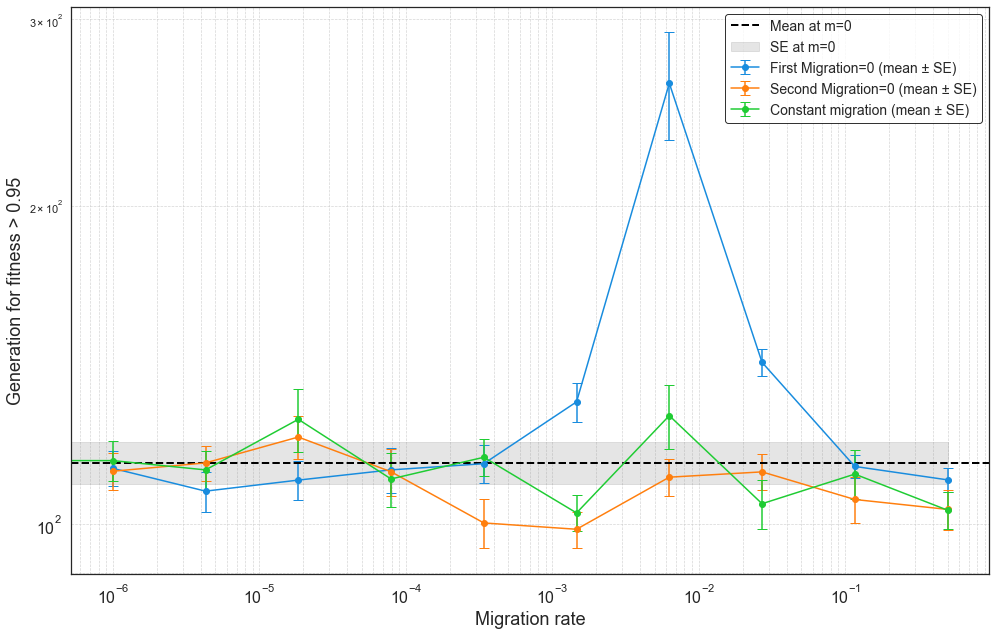

In [142]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Graph save settings
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# List of migration (mig) values (ascending order)
mig_values = [
    "0.0", "1.0e-06", "4.29753e-06", "1.84688e-05", "7.93701e-05", "0.000341095", "0.00146587", "0.00629961", "0.0270727", "0.116346", "0.5"
]

# Common part of the file name
file_templates = [
    'FGM_experiment_mig={}_run={}_p1.dat',
    'FGM_experiment_mig={}_run={}_p2.dat',
    'FGM_experiment_firstmig=0_mig={}_run={}_p1.dat',
    'FGM_experiment_firstmig=0_mig={}_run={}_p2.dat',
    'FGM_experiment_secondmig=0_mig={}_run={}_p1.dat',
    'FGM_experiment_secondmig=0_mig={}_run={}_p2.dat'
]

# 対応ファイルの追加条件
required_templates = {
    'FGM_experiment_firstmig=0_mig={}_run={}_p1.dat': 'FGM_experiment_firstmig=0_mig={}_run={}_p3.dat',
    'FGM_experiment_firstmig=0_mig={}_run={}_p2.dat': 'FGM_experiment_firstmig=0_mig={}_run={}_p3.dat',
    'FGM_experiment_secondmig=0_mig={}_run={}_p1.dat': 'FGM_experiment_secondmig=0_mig={}_run={}_p3.dat',
    'FGM_experiment_secondmig=0_mig={}_run={}_p2.dat': 'FGM_experiment_secondmig=0_mig={}_run={}_p3.dat'
}

# グラフの色とラベル
colors = ['# Color codes for plots
labels = ['First Migration=0', 'Second Migration=0', 'Constant migration']

# Output folder
output_folder = os.path.expanduser("~/Desktop/Output")
os.makedirs(output_folder, exist_ok=True)

# mig ごとに全 run のフィットネス世代を計算
results = []

for mig in mig_values:
    for run_number in range(100):
        for file_template in file_templates:
            file_path = file_template.format(mig, run_number)
            required_file = required_templates.get(file_template, None)
            required_file_path = required_file.format(mig, run_number) if required_file else None

            # 条件付きでデータを読み込む
            if required_file_path and not os.path.exists(required_file_path):
                continue

            try:
                # Load data
                data = pd.read_csv(file_path, delim_whitespace=True)

                # フィットネスが0.5および0.95を超える世代を抽出
                generation_0_5 = data[data['fitness'] > 0.5]['generation'].min()
                generation_0_95 = data[data['fitness'] > 0.95]['generation'].min()

                # ファイルタイプの判定
                if "firstmig=0" in file_path:
                    condition = "First Migration=0"
                elif "secondmig=0" in file_path:
                    condition = "Second Migration=0"
                else:
                    condition = "Constant migration"

                # 結果をリストに追加
                results.append({
                    "mig": mig,
                    "condition": condition,
                    "run_number": run_number,
                    "generation_0_5": generation_0_5,
                    "generation_0_95": generation_0_95
                })

            except FileNotFoundError:
                # print(f'File {file_path} not found.')
                pass
            except pd.errors.EmptyDataError:
                print(f'ファイル {file_path} にデータが含まれていません。')
            except Exception as e:
                print(f'ファイル {file_path} の処理中にエラーが発生しました: {e}')

# Save results to CSV
output_file = os.path.join(output_folder, "fitness_generations.csv")
pd.DataFrame(results).to_csv(output_file, index=False)
print(f"世代データを {output_file} に保存しました。")

# Analyze and plot results
results_df = pd.DataFrame(results)
results_df["mig_float"] = results_df["mig"].astype(float)

# Use Seaborn style for an elegant appearance
sns.set(style="white")

# Gen > 0.95 のプロット
plt.figure(figsize=(14, 9))
for idx, condition in enumerate(labels):
    condition_df = results_df[results_df["condition"] == condition]
    summary = condition_df.groupby("mig_float").agg(
        mean_0_95=("generation_0_95", "mean"),
        se_0_95=("generation_0_95", lambda x: np.std(x) / np.sqrt(len(x)))
    ).reset_index()
    plt.errorbar(summary["mig_float"], summary["mean_0_95"], yerr=summary["se_0_95"], 
                 fmt="o-", color=colors[idx], capsize=5, label=f"{condition} (mean ± SE)")

# m=0 の平均値とSEを表示
if 0.0 in results_df["mig_float"].values:
    zero_df = results_df[results_df["mig_float"] == 0.0]
    mean_0_95_at_zero = zero_df["generation_0_95"].mean()
    se_0_95_at_zero = zero_df["generation_0_95"].std() / np.sqrt(len(zero_df))
    plt.axhline(y=mean_0_95_at_zero, color="black", linestyle="--", linewidth=2, label="Mean at m=0")
    plt.fill_between([min(results_df["mig_float"]), max(results_df["mig_float"])],
                     mean_0_95_at_zero - se_0_95_at_zero, mean_0_95_at_zero + se_0_95_at_zero,
                     color="gray", alpha=0.2, label="SE at m=0")

# プロット設定
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Migration rate", fontsize=18)
plt.ylabel("Generation for fitness > 0.95", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(visible=True, which="both", linestyle="--", linewidth=0.7, alpha=0.8)
plt.legend(fontsize=14, fancybox=True, frameon=True, edgecolor="black", shadow=False)
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "generation_0_95_comparison.pdf"), format='pdf')
plt.show()


世代データを /Users/ryamaguchi/Desktop/Output/fitness_generations_ecological_pi6.csv に保存しました。


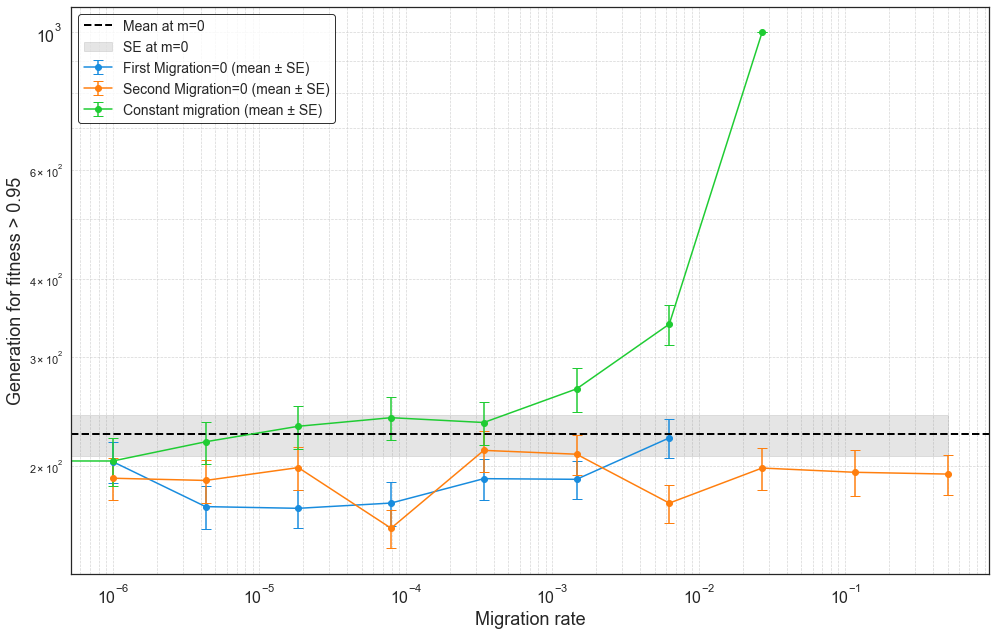

In [157]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Graph save settings
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# pi値を指定（例: pi2, pi4, pi6）
pi_value = "pi6"  # 任意に "pi4", "pi6" などに変更可能

# List of migration (mig) values (ascending order)
mig_values = [
    "0.0", "1.0e-06", "4.29753e-06", "1.84688e-05", "7.93701e-05", "0.000341095", "0.00146587", "0.00629961", "0.0270727", "0.116346", "0.5"
]

# Common part of the file name
file_templates = [
    f'FGM_experiment_ecological_{pi_value}_mig={{}}_run={{}}_p1.dat',
    f'FGM_experiment_ecological_{pi_value}_mig={{}}_run={{}}_p2.dat',
    f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p1.dat',
    f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p2.dat',
    f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p1.dat',
    f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p2.dat'
]

# 対応ファイルの追加条件
required_templates = {
    f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p1.dat': f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p3.dat',
    f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p2.dat': f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p3.dat',
    f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p1.dat': f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p3.dat',
    f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p2.dat': f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p3.dat'
}

# グラフの色とラベル
colors = ['# Color codes for plots
labels = ['First Migration=0', 'Second Migration=0', 'Constant migration']

# Output folder
output_folder = os.path.expanduser("~/Desktop/Output")
os.makedirs(output_folder, exist_ok=True)

# mig ごとに全 run のフィットネス世代を計算
results = []

for mig in mig_values:
    for run_number in range(100):
        for file_template in file_templates:
            file_path = file_template.format(mig, run_number)
            required_file = required_templates.get(file_template, None)
            required_file_path = required_file.format(mig, run_number) if required_file else None

            # 条件付きでデータを読み込む
            if required_file_path and not os.path.exists(required_file_path):
                continue

            try:
                # Load data
                data = pd.read_csv(file_path, delim_whitespace=True)

                # フィットネスが0.5および0.95を超える世代を抽出
                generation_0_5 = data[data['fitness'] > 0.5]['generation'].min()
                generation_0_95 = data[data['fitness'] > 0.95]['generation'].min()

                # ファイルタイプの判定
                if "firstmig=0" in file_path:
                    condition = "First Migration=0"
                elif "secondmig=0" in file_path:
                    condition = "Second Migration=0"
                else:
                    condition = "Constant migration"

                # 結果をリストに追加
                results.append({
                    "mig": mig,
                    "condition": condition,
                    "run_number": run_number,
                    "generation_0_5": generation_0_5,
                    "generation_0_95": generation_0_95
                })

            except FileNotFoundError:
                pass
            except pd.errors.EmptyDataError:
                print(f'ファイル {file_path} にデータが含まれていません。')
            except Exception as e:
                print(f'ファイル {file_path} の処理中にエラーが発生しました: {e}')

# Save results to CSV
output_file = os.path.join(output_folder, f"fitness_generations_ecological_{pi_value}.csv")
pd.DataFrame(results).to_csv(output_file, index=False)
print(f"世代データを {output_file} に保存しました。")

# Analyze and plot results
results_df = pd.DataFrame(results)
results_df["mig_float"] = results_df["mig"].astype(float)

# Use Seaborn style for an elegant appearance
sns.set(style="white")

# Gen > 0.95 のプロット
plt.figure(figsize=(14, 9))
for idx, condition in enumerate(labels):
    condition_df = results_df[results_df["condition"] == condition]
    summary = condition_df.groupby("mig_float").agg(
        mean_0_95=("generation_0_95", "mean"),
        se_0_95=("generation_0_95", lambda x: np.std(x) / np.sqrt(len(x)))
    ).reset_index()
    plt.errorbar(summary["mig_float"], summary["mean_0_95"], yerr=summary["se_0_95"], 
                 fmt="o-", color=colors[idx], capsize=5, label=f"{condition} (mean ± SE)")

# m=0 の平均値とSEを表示
if 0.0 in results_df["mig_float"].values:
    zero_df = results_df[results_df["mig_float"] == 0.0]
    mean_0_95_at_zero = zero_df["generation_0_95"].mean()
    se_0_95_at_zero = zero_df["generation_0_95"].std() / np.sqrt(len(zero_df))
    plt.axhline(y=mean_0_95_at_zero, color="black", linestyle="--", linewidth=2, label="Mean at m=0")
    plt.fill_between([min(results_df["mig_float"]), max(results_df["mig_float"])],
                     mean_0_95_at_zero - se_0_95_at_zero, mean_0_95_at_zero + se_0_95_at_zero,
                     color="gray", alpha=0.2, label="SE at m=0")

# プロット設定
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Migration rate", fontsize=18)
plt.ylabel("Generation for fitness > 0.95", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(visible=True, which="both", linestyle="--", linewidth=0.7, alpha=0.8)
plt.legend(fontsize=14, fancybox=True, frameon=True, edgecolor="black", shadow=False)
plt.tight_layout()
plt.savefig(os.path.join(output_folder, f"generation_0_95_comparison_ecological_{pi_value}.pdf"), format='pdf')
plt.show()

世代データを /Users/ryamaguchi/Desktop/Output/fitness_generations_ecological_pi4.csv に保存しました。


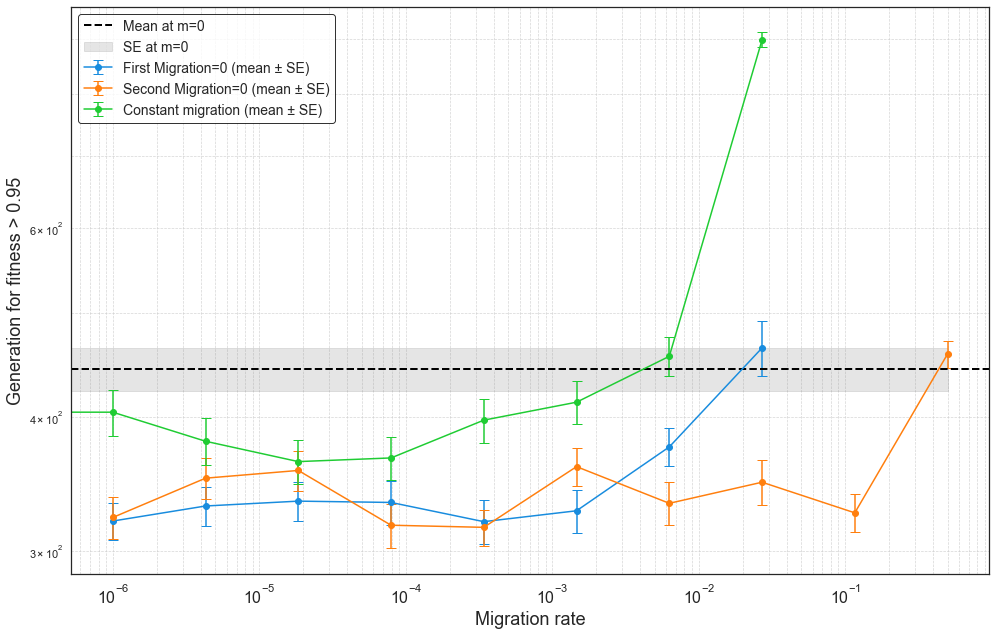

In [160]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Graph save settings
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# pi値を指定（例: pi2, pi4, pi6）
pi_value = "pi4"  # 任意に "pi4", "pi6" などに変更可能

# List of migration (mig) values (ascending order)
mig_values = [
    "0.0", "1.0e-06", "4.29753e-06", "1.84688e-05", "7.93701e-05", "0.000341095", "0.00146587", "0.00629961", "0.0270727", "0.116346", "0.5"
]

# Common part of the file name
file_templates = [
    f'FGM_experiment_ecological_{pi_value}_mig={{}}_run={{}}_p1.dat',
    f'FGM_experiment_ecological_{pi_value}_mig={{}}_run={{}}_p2.dat',
    f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p1.dat',
    f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p2.dat',
    f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p1.dat',
    f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p2.dat'
]

# 対応ファイルの追加条件
required_templates = {
    f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p1.dat': f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p3.dat',
    f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p2.dat': f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p3.dat',
    f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p1.dat': f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p3.dat',
    f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p2.dat': f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p3.dat'
}

# グラフの色とラベル
colors = ['# Color codes for plots
labels = ['First Migration=0', 'Second Migration=0', 'Constant migration']

# Output folder
output_folder = os.path.expanduser("~/Desktop/Output")
os.makedirs(output_folder, exist_ok=True)

# mig ごとに全 run のフィットネス世代を計算
results = []

for mig in mig_values:
    for run_number in range(100):
        for file_template in file_templates:
            file_path = file_template.format(mig, run_number)
            required_file = required_templates.get(file_template, None)
            required_file_path = required_file.format(mig, run_number) if required_file else None

            # 条件付きでデータを読み込む
            if required_file_path and not os.path.exists(required_file_path):
                continue

            try:
                # Load data
                data = pd.read_csv(file_path, delim_whitespace=True)

                # フィットネスが0.5および0.95を超える世代を抽出
                generation_0_5 = data[data['fitness'] > 0.5]['generation'].min()
                generation_0_95 = data[data['fitness'] > 0.95]['generation'].min()

                # ファイルタイプの判定
                if "firstmig=0" in file_path:
                    condition = "First Migration=0"
                elif "secondmig=0" in file_path:
                    condition = "Second Migration=0"
                else:
                    condition = "Constant migration"

                # 結果をリストに追加
                results.append({
                    "mig": mig,
                    "condition": condition,
                    "run_number": run_number,
                    "generation_0_5": generation_0_5,
                    "generation_0_95": generation_0_95
                })

            except FileNotFoundError:
                pass
            except pd.errors.EmptyDataError:
                print(f'ファイル {file_path} にデータが含まれていません。')
            except Exception as e:
                print(f'ファイル {file_path} の処理中にエラーが発生しました: {e}')

# Save results to CSV
output_file = os.path.join(output_folder, f"fitness_generations_ecological_{pi_value}.csv")
pd.DataFrame(results).to_csv(output_file, index=False)
print(f"世代データを {output_file} に保存しました。")

# Analyze and plot results
results_df = pd.DataFrame(results)
results_df["mig_float"] = results_df["mig"].astype(float)

# Use Seaborn style for an elegant appearance
sns.set(style="white")

# Gen > 0.95 のプロット
plt.figure(figsize=(14, 9))
for idx, condition in enumerate(labels):
    condition_df = results_df[results_df["condition"] == condition]
    summary = condition_df.groupby("mig_float").agg(
        mean_0_95=("generation_0_95", "mean"),
        se_0_95=("generation_0_95", lambda x: np.std(x) / np.sqrt(len(x)))
    ).reset_index()
    plt.errorbar(summary["mig_float"], summary["mean_0_95"], yerr=summary["se_0_95"], 
                 fmt="o-", color=colors[idx], capsize=5, label=f"{condition} (mean ± SE)")

# m=0 の平均値とSEを表示
if 0.0 in results_df["mig_float"].values:
    zero_df = results_df[results_df["mig_float"] == 0.0]
    mean_0_95_at_zero = zero_df["generation_0_95"].mean()
    se_0_95_at_zero = zero_df["generation_0_95"].std() / np.sqrt(len(zero_df))
    plt.axhline(y=mean_0_95_at_zero, color="black", linestyle="--", linewidth=2, label="Mean at m=0")
    plt.fill_between([min(results_df["mig_float"]), max(results_df["mig_float"])],
                     mean_0_95_at_zero - se_0_95_at_zero, mean_0_95_at_zero + se_0_95_at_zero,
                     color="gray", alpha=0.2, label="SE at m=0")

# プロット設定
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Migration rate", fontsize=18)
plt.ylabel("Generation for fitness > 0.95", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(visible=True, which="both", linestyle="--", linewidth=0.7, alpha=0.8)
plt.legend(fontsize=14, fancybox=True, frameon=True, edgecolor="black", shadow=False)
plt.tight_layout()
plt.savefig(os.path.join(output_folder, f"generation_0_95_comparison_ecological_{pi_value}.pdf"), format='pdf')
plt.show()

世代データを /Users/ryamaguchi/Desktop/Output/fitness_generations_ecological_pi2.csv に保存しました。


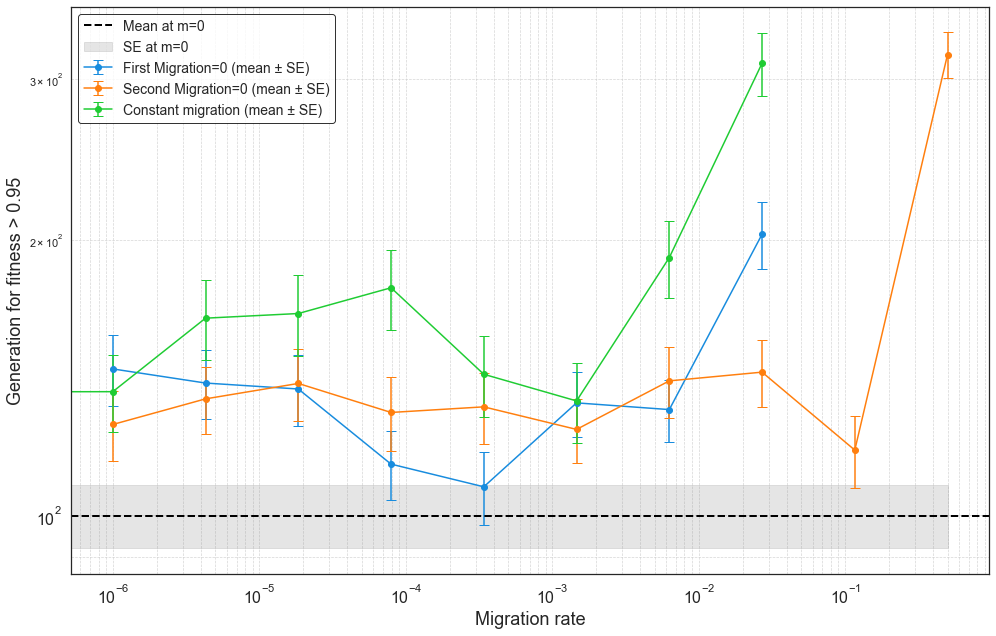

In [155]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Graph save settings
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# pi値を指定（例: pi2, pi4, pi6）
pi_value = "pi2"  # 任意に "pi4", "pi6" などに変更可能

# List of migration (mig) values (ascending order)
mig_values = [
    "0.0", "1.0e-06", "4.29753e-06", "1.84688e-05", "7.93701e-05", "0.000341095", "0.00146587", "0.00629961", "0.0270727", "0.116346", "0.5"
]

# Common part of the file name
file_templates = [
    f'FGM_experiment_ecological_{pi_value}_mig={{}}_run={{}}_p1.dat',
    f'FGM_experiment_ecological_{pi_value}_mig={{}}_run={{}}_p2.dat',
    f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p1.dat',
    f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p2.dat',
    f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p1.dat',
    f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p2.dat'
]

# 対応ファイルの追加条件
required_templates = {
    f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p1.dat': f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p3.dat',
    f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p2.dat': f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p3.dat',
    f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p1.dat': f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p3.dat',
    f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p2.dat': f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p3.dat'
}

# グラフの色とラベル
colors = ['# Color codes for plots
labels = ['First Migration=0', 'Second Migration=0', 'Constant migration']

# Output folder
output_folder = os.path.expanduser("~/Desktop/Output")
os.makedirs(output_folder, exist_ok=True)

# mig ごとに全 run のフィットネス世代を計算
results = []

for mig in mig_values:
    for run_number in range(100):
        for file_template in file_templates:
            file_path = file_template.format(mig, run_number)
            required_file = required_templates.get(file_template, None)
            required_file_path = required_file.format(mig, run_number) if required_file else None

            # 条件付きでデータを読み込む
            if required_file_path and not os.path.exists(required_file_path):
                continue

            try:
                # Load data
                data = pd.read_csv(file_path, delim_whitespace=True)

                # フィットネスが0.5および0.95を超える世代を抽出
                generation_0_5 = data[data['fitness'] > 0.5]['generation'].min()
                generation_0_95 = data[data['fitness'] > 0.95]['generation'].min()

                # ファイルタイプの判定
                if "firstmig=0" in file_path:
                    condition = "First Migration=0"
                elif "secondmig=0" in file_path:
                    condition = "Second Migration=0"
                else:
                    condition = "Constant migration"

                # 結果をリストに追加
                results.append({
                    "mig": mig,
                    "condition": condition,
                    "run_number": run_number,
                    "generation_0_5": generation_0_5,
                    "generation_0_95": generation_0_95
                })

            except FileNotFoundError:
                pass
            except pd.errors.EmptyDataError:
                print(f'ファイル {file_path} にデータが含まれていません。')
            except Exception as e:
                print(f'ファイル {file_path} の処理中にエラーが発生しました: {e}')

# Save results to CSV
output_file = os.path.join(output_folder, f"fitness_generations_ecological_{pi_value}.csv")
pd.DataFrame(results).to_csv(output_file, index=False)
print(f"世代データを {output_file} に保存しました。")

# Analyze and plot results
results_df = pd.DataFrame(results)
results_df["mig_float"] = results_df["mig"].astype(float)

# Use Seaborn style for an elegant appearance
sns.set(style="white")

# Gen > 0.95 のプロット
plt.figure(figsize=(14, 9))
for idx, condition in enumerate(labels):
    condition_df = results_df[results_df["condition"] == condition]
    summary = condition_df.groupby("mig_float").agg(
        mean_0_95=("generation_0_95", "mean"),
        se_0_95=("generation_0_95", lambda x: np.std(x) / np.sqrt(len(x)))
    ).reset_index()
    plt.errorbar(summary["mig_float"], summary["mean_0_95"], yerr=summary["se_0_95"], 
                 fmt="o-", color=colors[idx], capsize=5, label=f"{condition} (mean ± SE)")

# m=0 の平均値とSEを表示
if 0.0 in results_df["mig_float"].values:
    zero_df = results_df[results_df["mig_float"] == 0.0]
    mean_0_95_at_zero = zero_df["generation_0_95"].mean()
    se_0_95_at_zero = zero_df["generation_0_95"].std() / np.sqrt(len(zero_df))
    plt.axhline(y=mean_0_95_at_zero, color="black", linestyle="--", linewidth=2, label="Mean at m=0")
    plt.fill_between([min(results_df["mig_float"]), max(results_df["mig_float"])],
                     mean_0_95_at_zero - se_0_95_at_zero, mean_0_95_at_zero + se_0_95_at_zero,
                     color="gray", alpha=0.2, label="SE at m=0")

# プロット設定
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Migration rate", fontsize=18)
plt.ylabel("Generation for fitness > 0.95", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(visible=True, which="both", linestyle="--", linewidth=0.7, alpha=0.8)
plt.legend(fontsize=14, fancybox=True, frameon=True, edgecolor="black", shadow=False)
plt.tight_layout()
plt.savefig(os.path.join(output_folder, f"generation_0_95_comparison_ecological_{pi_value}.pdf"), format='pdf')
plt.show()

In [ ]:
# Example of evolutionary trajectories

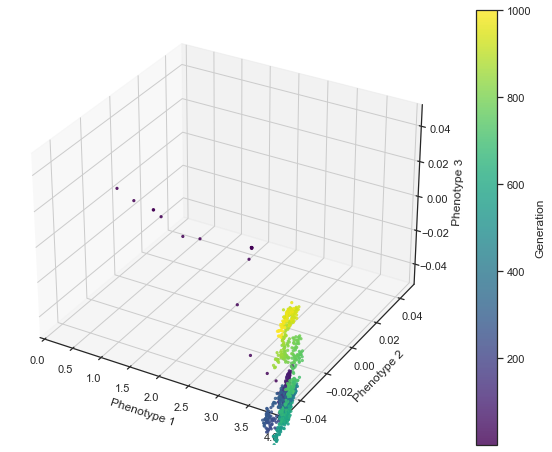

In [62]:
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Graph save settings
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42  # Save plot as an .svg file for Adobe Illustrator editing

# Use Seaborn style for an elegant appearance
sns.set(style="white")

# Output folder
output_folder = os.path.expanduser("~/Desktop/Output")
os.makedirs(output_folder, exist_ok=True)

# Extract the phenotype columns for visualization
phenotype_columns = ['phenotype1', 'phenotype2', 'phenotype3', 'phenotype4']
phenotypes = data[phenotype_columns]

# Create a 3D scatter plot for the first three phenotypes
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    phenotypes['phenotype1'],
    phenotypes['phenotype2'],
    phenotypes['phenotype3'],
    c=data['generation'],
    cmap='viridis',
    s=5,
    alpha=0.8
)

# Set axis limits
ax.set_xlim([0, 4])
ax.set_ylim([-0.05, 0.05])
ax.set_zlim([-0.05, 0.05])

# Add color bar for generations
cbar = fig.colorbar(scatter, ax=ax, label='Generation')

# Label the axes
ax.set_xlabel('Phenotype 1')
ax.set_ylabel('Phenotype 2')
ax.set_zlabel('Phenotype 3')

# Specify save destination
file_name = os.path.join(output_folder, "trajectory_plot.svg")
plt.savefig(file_name, format='svg')
plt.show()